# Car Sale Price Prediction from car dekho data.

### Table of Contents

* [Get to know the dataset and the features](#one)

    * [Importing Libraries!](#two)
    * [Reading Files](#three)
    * [Data Overview](#four)
      

* [Preprocessing](#five)

    *  [Data Cleaning](#six)
    *  [Null values Imputation](#seven)


* [Exploratory Data Analaysis](#eight)

    *  [EDA on Numerical Data](#nine)
    *  [EDA on Categorical Data](#ten)
    

* [Base Model : Linear Regression](#11)

    *  [Base Model 1:Categorical Variables Label encoded](#12)
    *  [Base Model 2:Categorical Variables Dummy encoded](#13)
    

* [Assumptions of Linear Regression](#14)
    
    *  [Normality](#15)
    *  [Linearity](#16)
    * [Homoscedasticity](#16)
    *  [Autocorrelation](#16)
    *  [Multicollinearity](#17)
    *  [Inferences](#18)
    

* [Regularization](#19)
    
    * [Ridge Regularization](#20)
    * [Hyperparameter-Alpha Tuning](#21)
    

* [Decision Tree Regressor Model](#22)


* [Ensemble Techniques](#23)

    * [Random Forest Regressor Model](#24)
        * [Validation curve Random Forest Regressor](#25)
        * [Hyper Parameter Tuning: Grid Search CV](#26)
        * [Tuned Random Forest Regressor Model](#27)
      
    * [XGBoost Regressor](#28)
        * [Validation curve XGBoost Regressor](#29)
        * [Hyper Parameter Tuning: Grid Search CV](#30)
        * [Tuned XGBoost Regressor Model](#31)
    
  
* [Conclusion](#32)        

<a class="anchor" id="one"></a>
# Get to know the dataset and the features

Thoughts and assumptions on each feature:

1. selling_price :our target variable since we are predicting the price of vehicles
2. name: Name and model of vehicle, I think the brand and name of the car will be somewhat valuable.
3. year: The year when the vehicle is bought , I'll convert it to age as age can have inverse relation with price.
4. km_driven: This can indirectly tell us the condition of the vehicle, vehicle which travelled a longer distance tends to mean                the vehicle is older and hence the selling price will be lower.
5. fuel: Diesel vs petrol should make a difference since the price of the fuel and the engine type are not the same.
6. seller_type: I assume selling price of vehicle for 'Individual seller' should be lower since 'Dealer' often charge commission                 or service fee or any form of fees.
7. transmission: I assume 'Manual' car should be cheaper than 'Automatic' vehicle, as of my experience.
8. owner: This specify the number of owners the vehicle had before, I assume the more owners the vehicle had before, the cheaper           the vehicle will be.
9. mileage: I think higher mileage vehicle should be higher in selling_price.
10. engine: The Cubic Capacity(CC) of engine, I assume higher CC vehicle should be higher in selling_price.
11. max_power: The Brake Horse Power(BHP) of the vehicle, I assume higher BHP should be higher in selling_price.
12. torque: The torque of the vehicle, for modelling purpose, this does not contain much information since they are rated at                 different rpm, so I will drop this feature.
13. seats: Seats can possibly represent the size of the vehicle, I assume the vehicle with more seats will be higher in selling            price.


<a class="anchor" id="two"></a>
#### Importing Libraries!

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import validation_curve

from xgboost import XGBRegressor

<a class="anchor" id="three"></a>
#### Reading Files and displaying dataset head

In [151]:
df=pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [152]:
df.shape

(8128, 13)

<a class="anchor" id="four"></a>
#### Data Overview (pandas profiling)

In [153]:
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()

<a class="anchor" id="five"></a>
## PREPROCESSING

<a class="anchor" id="six"></a>
#### Data Cleaning before treating missing values.

In [154]:
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [155]:
## need to remove kmpl from column and also replace null values by np.nan
df['mileage'] = df['mileage'].fillna('0 kmpl')
mileage= []
for i in df['mileage'].str.split(' '):
    mileage.append(float(i[0]))
df['mileage'] = mileage
df['mileage'] = df['mileage'].replace({0:np.nan})

In [156]:
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [157]:
## need to remove CC from column and also replace null values by np.nan
df['engine'] = df['engine'].fillna('0 CC')
engine= []
for i in df['engine'].str.split(' '):
    engine.append(float(i[0]))
df['engine'] = engine
df['engine'] = df['engine'].replace({0:np.nan})

In [158]:
## need to remove bhp from column and also replace null values by np.nan
df['max_power']

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object

In [159]:
## need to remove bhp from column and also replace null values by np.nan
## we have a anamoly in dataset as '0', ' bhp' which needs to be converted to 0 bhp
df['max_power'] = df['max_power'].replace({'0':'0 bhp',' bhp':'0 bhp',np.nan:'0 bhp'})

max_power= []
for i in df['max_power'].str.split(' '):
    max_power.append(float(i[0]))
df['max_power'] = max_power
df['max_power'] = df['max_power'].replace({0:np.nan})

In [160]:
df['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [161]:
df=df.drop(columns=['torque'])

In [162]:
## keeping only brand name and model name from name as brand name affects the the price of a car.
car=[]
for i in df['name'].str.split(' '):
    car.append(' '.join(i[:2]))
df['car']=car

In [163]:
## Now droping name column from dataset.
df=df.drop(columns=['name'])

<a class="anchor" id="seven"></a>
#### NULL VALUES IMPUTATION

In [164]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          238
engine           221
max_power        222
seats            221
car                0
dtype: int64

#### We know that different cars have different mileage,engine power,max_power and seats.We will be imputing data for null values by the average values on the basis of car name.

In [165]:
## Applying group by to find out average values of mileage,engine,max_power and 
## checking if there are particular car which do not have these values at all in the dataset.
df.groupby(car).mean().sort_values(by='mileage').isnull().sum()


year              0
selling_price     0
km_driven         0
mileage          11
engine           10
max_power        10
seats            10
dtype: int64

In [166]:
### Name of the car which does not have mileage atall.
df.groupby(car).mean().sort_values(by='mileage').isnull().tail(11).index

Index(['Fiat Palio', 'Mahindra Ingenio', 'Mahindra Jeep', 'Mahindra Marshal',
       'Mahindra Willys', 'Maruti Estilo', 'Mercedes-Benz GLC', 'Peugeot 309',
       'Tata Estate', 'Toyota Premio', 'Volkswagen Multivan'],
      dtype='object')

In [167]:
### finding rows which need to be droped from the dataset and droping them from the dataset
null_cars=['Fiat Palio', 'Mahindra Ingenio', 'Mahindra Jeep', 'Mahindra Marshal','Mahindra Willys', 'Maruti Estilo', 
'Mercedes-Benz GLC', 'Peugeot 309','Tata Estate', 'Toyota Premio', 'Volkswagen Multivan']
data= pd.DataFrame()

for i in null_cars:
    data= pd .concat([data,df[df['car']==i]],axis=0)


In [174]:
data.index

Int64Index([  31, 5005, 7538, 1347, 1216, 1432, 1815, 2867, 3922, 5385, 5451,
             316,  535, 1933, 6516, 7275, 7528, 7337, 6730, 3310, 2959, 3456],
           dtype='int64')

In [176]:
## droping rows in dataset where rows index as above
df=df.drop(index=[31, 5005, 7538, 1347, 1216, 1432, 1815, 2867, 3922, 5385, 5451,316,  535, 1933, 
6516, 7275, 7528, 7337, 6730, 3310, 2959, 3456]).reset_index(drop=True)

In [181]:
## Sanity check if groupby columns is having 0 null values
df.groupby('car').mean().sort_values(by='mileage').isnull().sum()


year             0
selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [195]:
#### Imputing using Transform function on group by clause
''
df["mileage"]=df.groupby("car").transform(lambda x: x.fillna(x.mean()))["mileage"]
df["engine"] = df.groupby("car").transform(lambda x: x.fillna(x.mean()))["engine"]
df["max_power"] = df.groupby("car").transform(lambda x: x.fillna(x.mean()))["max_power"]
df["seats"] = df.groupby("car").transform(lambda x: x.fillna(np.round(x.mean())))["seats"]

In [198]:
#Sanity check

df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
car              0
dtype: int64

In [206]:
### Finally Droping Duplicated values
df=df[~df.duplicated()]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti Swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda City
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti Swift
...,...,...,...,...,...,...,...,...,...,...,...,...
8099,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti Wagon
8100,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai i20
8101,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai i20
8102,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai Verna


In [214]:
#Converting year into age and then removing age column
df['age']=2021-df['year']
df['age']

df=df.drop(columns=['year'])

In [215]:
### type conversion of seats to object

df['seats']=df['seats'].astype('O')

In [217]:
df.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats             object
car               object
age                int64
dtype: object

<a class="anchor" id="eight"></a>
## EXPLORATORY DATA ANALYSIS

In [225]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

<a class="anchor" id="nine"></a>
#### EDA on Numerical Data

<Figure size 1080x864 with 0 Axes>

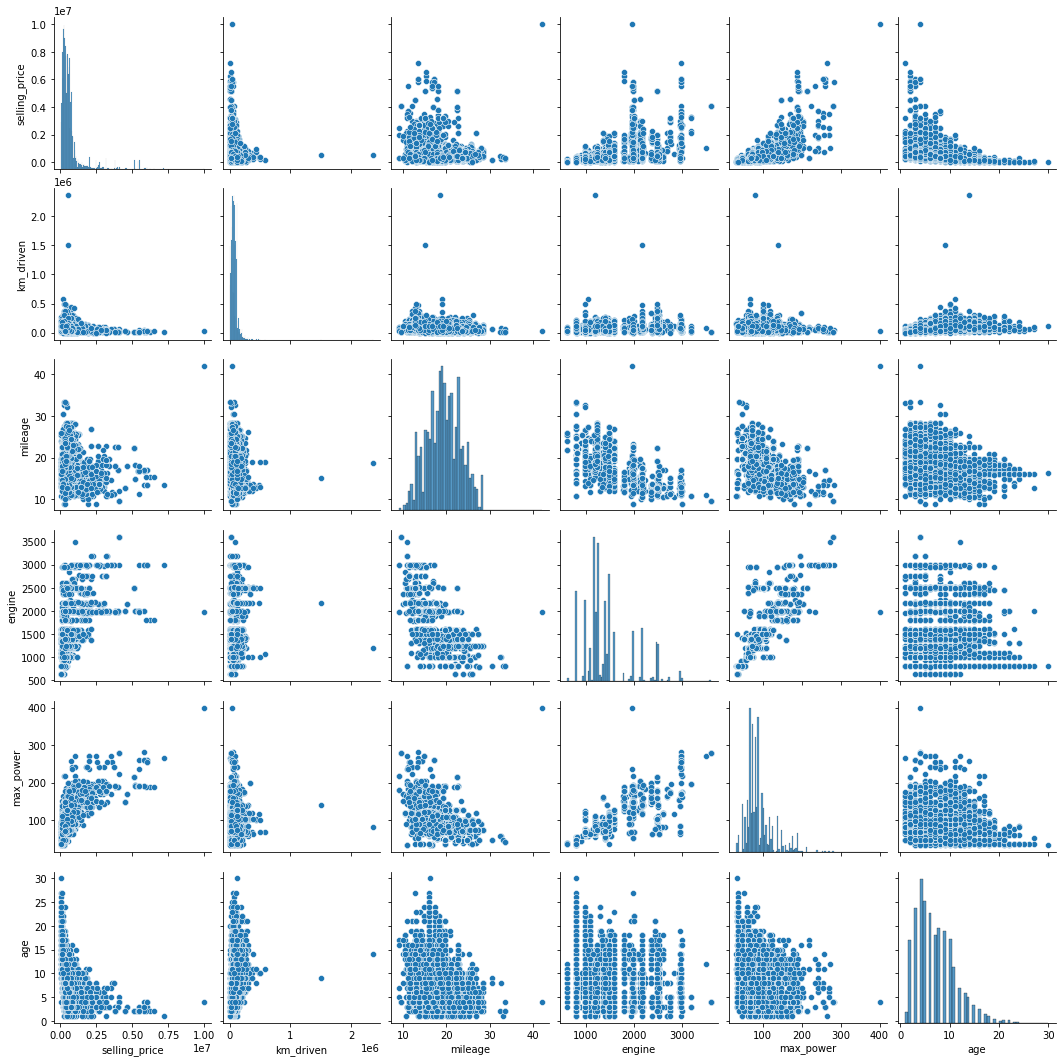

In [226]:
plt.figure(figsize=(15,12))
sns.pairplot(df_num)
plt.show()

<AxesSubplot:>

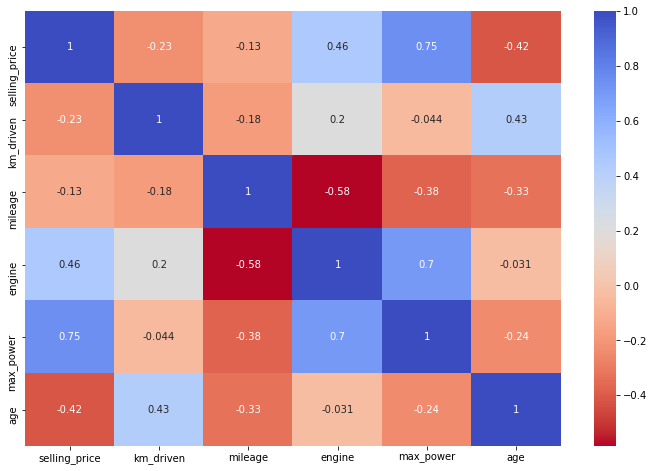

In [227]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.coolwarm_r)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


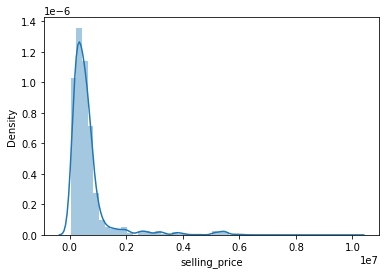

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


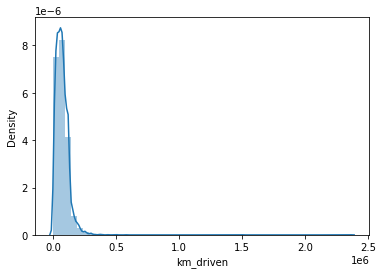

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


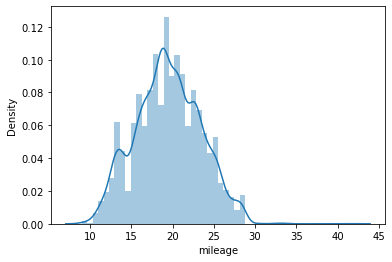

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


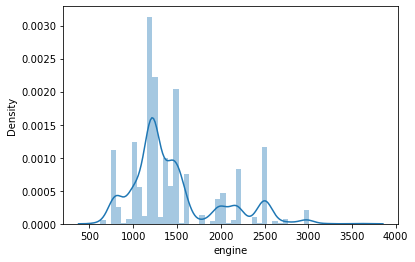

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


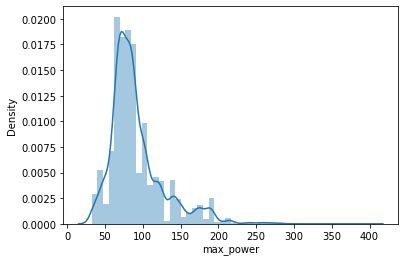

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


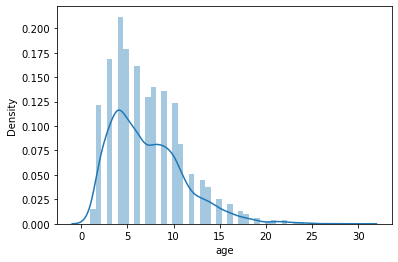

In [228]:
for i in df_num:
    sns.distplot(df_num[i])
    plt.show()

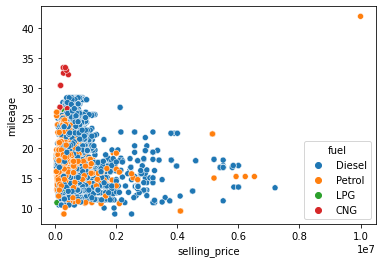

In [235]:
sns.scatterplot(data = df,x = 'selling_price',y = 'mileage',hue='fuel')
plt.show()

In [ ]:
## CNG cars are most fuel efficient and cost effective.
## Mileage for petrol and diesel car is within the range of 10-30 Kmpl

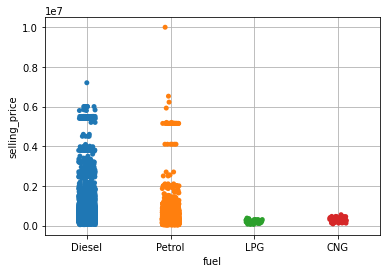

In [236]:
sns.stripplot(y=df['selling_price'],x=df['fuel'])
plt.grid()
plt.show()

In [ ]:
# Petrol cars are comparitively cheaaper in comparison to Diesel cars(under Rs. 2 lakhs) 
# High Concentration of Petrol Cars in the selling price range : 0-2 lakhs
# High Concentration of Diesel Cars in the selling price range : 0-6 lakhs


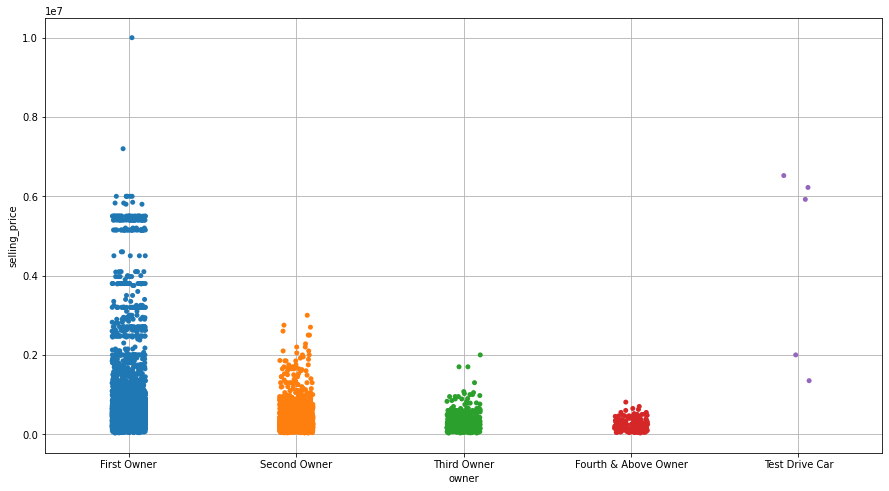

In [239]:
plt.figure(figsize=(15,8))
sns.stripplot(y=df['selling_price'],x=df['owner'])
plt.grid()
plt.show()

In [ ]:
## It is clearly visible that selling price is decreasing as the pre owner no increases.

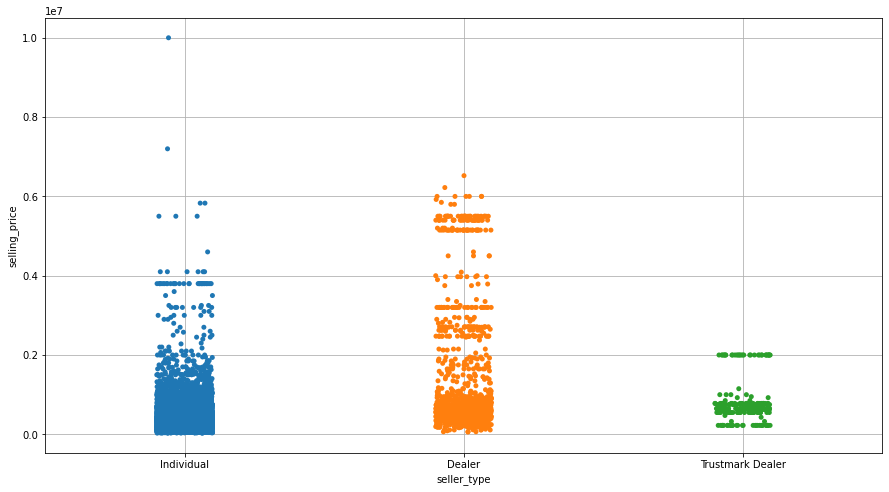

In [243]:
plt.figure(figsize=(15,8))
sns.stripplot(y=df['selling_price'],x=df['seller_type'])
plt.grid()
plt.show()

In [ ]:
## Dealer Type seller type is able to get a higher bid for a car as compare to individual seller type

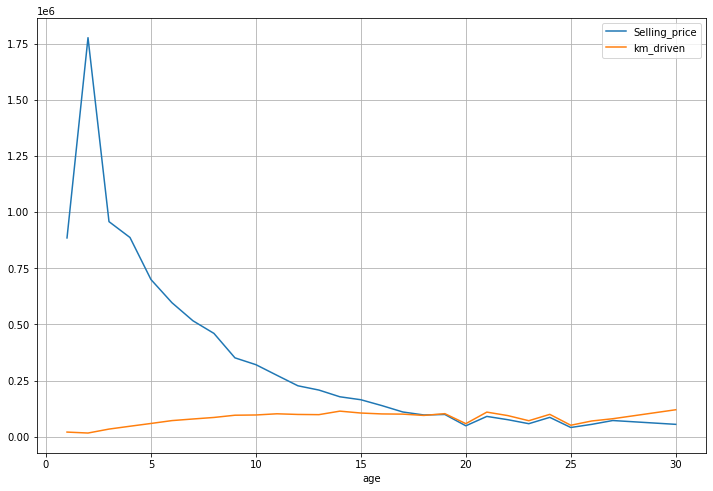

In [255]:
plt.figure(figsize=(12,8))
df_num.groupby(['age']).mean()['selling_price'].plot(kind='line',grid=True,label='Selling_price')
df_num.groupby(['age']).mean()['km_driven'].plot(kind='line',grid=True)
plt.legend()
plt.show()

In [ ]:
### As age increases selling price decreases and Kms driven increases

<a class="anchor" id="ten"></a>
#### EDA on Categorical Data

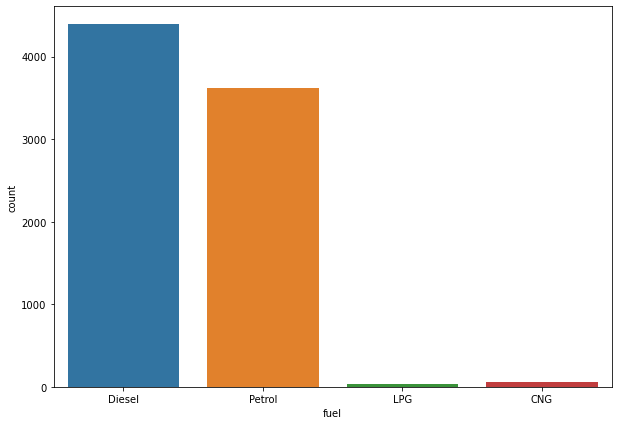

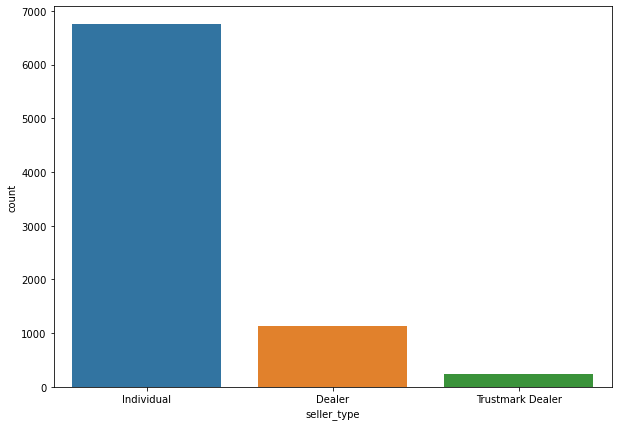

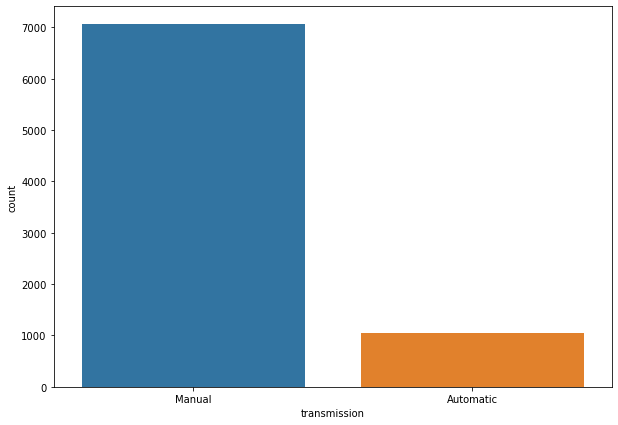

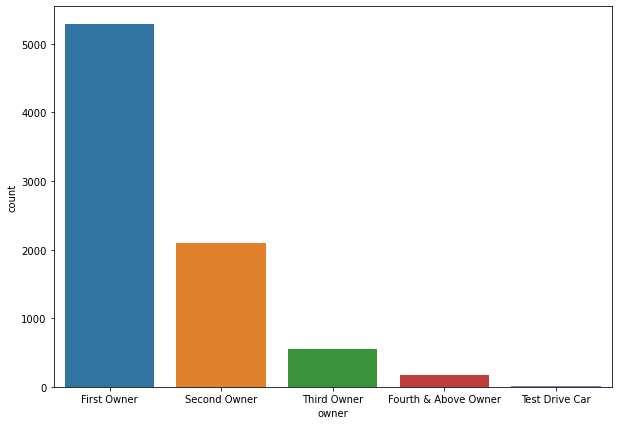

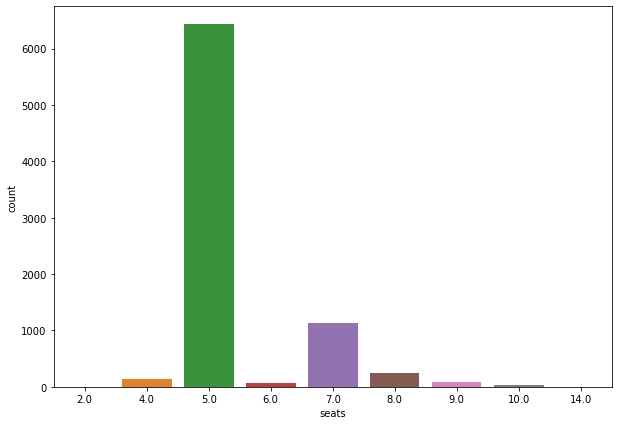

In [414]:
for i in df_cat.iloc[:,:-1]:
    plt.figure(figsize=(10,7))
    sns.countplot(df[i])
    plt.show()

In [ ]:
## Diesel cars are more in our dataset as compared to other fuel types.
## Individual seller type is in  majority in seller type.
## Maximum cars in our dataset is haivng seating capacity of 5.
## Manual cars are more as compared to automatic cars 

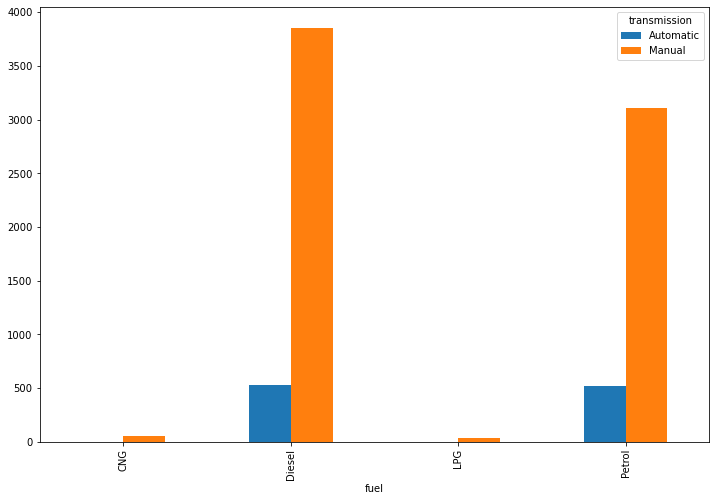

In [273]:
pd.crosstab(df['fuel'],df['transmission']).plot(kind='bar',figsize=(12,8))
plt.show()

In [ ]:
## No automatic tranmission in LPG and CNG duel type
## Manual transmission is predominant in both Diesel and Petrol cars

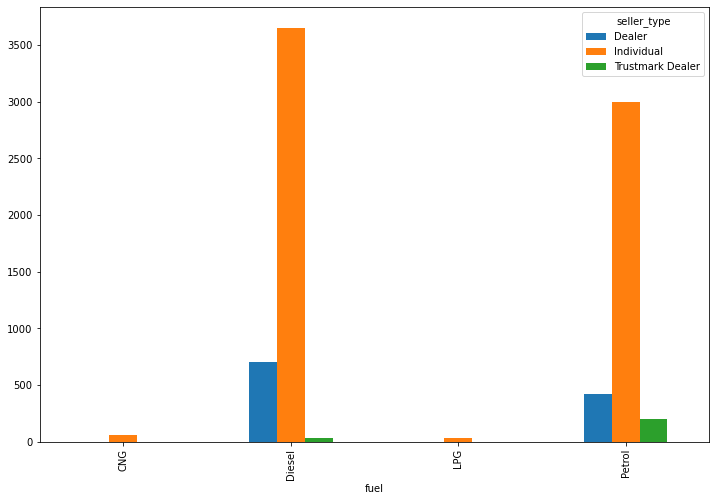

In [271]:
pd.crosstab(df['fuel'],df['seller_type']).plot(kind='bar',figsize=(12,8))
plt.show()

In [ ]:
## No Trustmark ,dealer seller types in LPG and CNG fuel type.

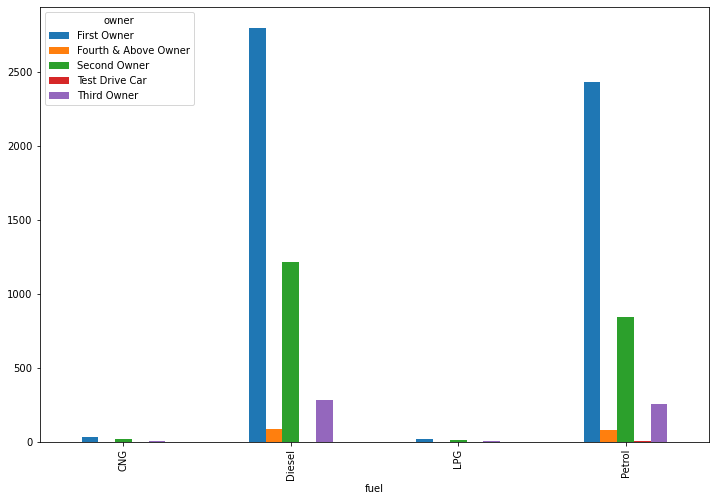

In [275]:
pd.crosstab(df['fuel'],df['owner']).plot(kind='bar',figsize=(12,8))
plt.show()

In [ ]:
## Test drive cars are available only in petrol fuel type
## First Owner cars is predominant in both Diesel and Petrol fuel type

<a class="anchor" id="11"></a>
## BASE MODEL : LINEAR REGRESSION

<a class="anchor" id="12"></a>
####  BASE MODEL 1 : CATEGORICAL VARAIBLE  LABEL ENCODED

In [277]:
#### Encoding all categorical variables into Label encoding
le=LabelEncoder()
df_cat_base=pd.DataFrame()
for i in df_cat.columns:
    df_cat_base[i]=le.fit_transform(df_cat[i])
df_cat_base    

,fuel,seller_type,transmission,owner,seats,car
0,1,1,1,0,2,120
1,1,1,1,2,2,154
2,3,1,1,4,2,55
3,1,1,1,0,2,75
4,3,1,1,0,2,120
...,...,...,...,...,...,...
8101,3,1,1,0,2,75
8102,1,1,1,1,2,72
8103,1,1,1,0,2,120
8104,1,1,1,0,2,162


#### MODEL PREPARATION

In [280]:
df_base=pd.DataFrame(pd.concat([df_num,df_cat_base],axis=1))
X_base=df_base.iloc[:,1:]
y_base=df_base.iloc[:,0]

#### TRAIN TEST SPLIT

In [286]:
X_train,X_test,y_train,y_test=train_test_split(X_base,y_base,random_state=8)

#### LINEAR REGRESSION (Categorical variable label encoded)

In [287]:
lin_reg= LinearRegression()

lin_reg.fit(X_train,y_train)
print('Train score')
print(lin_reg.score(X_train,y_train))

Train score
0.6825935904573823


In [288]:
print('Test score')
print(lin_reg.score(X_test,y_test))

Test score
0.6647127586762577


<a class="anchor" id="13"></a>
#### BASE MODEL 2 :CATEGORICAL VARAIBLE DUMMY ENCODING

In [291]:
df_cat_dummy_base=pd.get_dummies(df_cat,drop_first=True)

#### MODEL PREPARATION

In [296]:
df_base_dummy=pd.DataFrame(pd.concat([df_num,df_cat_dummy_base],axis=1))
X_base_dummy=df_base_dummy.iloc[:,1:]
y_base_dummy=df_base_dummy.iloc[:,0]

#### TRAIN TEST SPLIT

In [297]:
X_train_d,X_test_d,y_train_d,y_test_d=train_test_split(X_base_dummy,y_base_dummy,random_state=8)

#### LINEAR REGRESSION (Categorical variable dummy encoded)

In [440]:
lin_reg= LinearRegression()

lin_reg.fit(X_train_d,y_train_d)
print('Train score')
print(lin_reg.score(X_train_d,y_train_d))

Train score
0.9580189844756527


In [441]:
print('Test score')
print(lin_reg.score(X_test_d,y_test_d))

Test score
0.872440065559928


#NOTE:

-It is observed that base model with categorical variables encoded with dummy encoding is 
performing better than the label encoded model.

-We will take base model with dummy encoding ahead.


<a class="anchor" id="14"></a>
## ASSUMPTIONs OF LINEAR REGRESSION

In [308]:
### APPLYING OLS for Assumptions

import statsmodels.api as sm
model=sm.OLS(y_train_d,sm.add_constant(X_train_d)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     631.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:23:21   Log-Likelihood:                -81704.
No. Observations:                6079   AIC:                         1.638e+05
Df Residuals:                    5866   BIC:                         1.653e+05
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.011e+06   1.49e+05      6.766      0.000    7.18e+05     1.3e+06
km_driven                       -0.3871      0.045     -8.615      0.000      -0.475      -0.299
mileage                       3599.7603   1552.555      2.319      0.020     556.181    6643.340
engine                        -179.6936     21.928     -8.195      0.000    -222.681    -136.706
max_power                     3348.7261    273.354     12.250      0.000    2812.851    3884.601
age                          -4.031e+04    987.835    -40.805      0.000   -4.22e+04   -3.84e+04
fuel_Diesel                   1.092e+05   2.96e+04      3.692      0.000    5.12e+04    1.67e+05
fuel_LPG                      1.331e+05   4.55e+04      2.927      0.003     4.4e+04    2.22e+05
fuel_Petrol                   5.626e+04      3e+04      1.875      0.061   -2572.185    1.15e+05
seller_type_Individual       -3.825e+04   7621.650     -5.018      0.000   -5.32e+04   -2.33e+04
seller_type_Trustmark Dealer  -7.24e+04    1.7e+04     -4.256      0.000   -1.06e+05   -3.91e+04
transmission_Manual          -1.071e+05   9842.973    -10.882      0.000   -1.26e+05   -8.78e+04
owner_Fourth & Above Owner    1422.8858   1.63e+04      0.087      0.931   -3.06e+04    3.35e+04
owner_Second Owner           -3.495e+04   5765.372     -6.062      0.000   -4.63e+04   -2.36e+04
owner_Test Drive Car          2.066e+06   9.67e+04     21.363      0.000    1.88e+06    2.26e+06
owner_Third Owner            -2.958e+04   9764.918     -3.029      0.002   -4.87e+04   -1.04e+04
seats_4.0                     1.279e+05   6.73e+04      1.901      0.057   -4002.227     2.6e+05
seats_5.0                     1.194e+05   3.82e+04      3.126      0.002    4.45e+04    1.94e+05
seats_6.0                      1.37e+05   6.44e+04      2.127      0.033    1.07e+04    2.63e+05
seats_7.0                     2.446e+05   3.82e+04      6.406      0.000     1.7e+05    3.19e+05
seats_8.0                     1.602e+05      4e+04      4.007      0.000    8.18e+04    2.39e+05
seats_9.0                     2.048e+05   4.28e+04      4.787      0.000    1.21e+05    2.89e+05
seats_10.0                      1.5e+05   6.54e+04      2.293      0.022    2.18e+04    2.78e+05
seats_14.0                   -1.333e+05   1.07e+05     -1.249      0.212   -3.43e+05    7.59e+04
car_Ambassador Classic        3.054e+05    2.4e+05      1.274      0.203   -1.64e+05    7.75e+05
car_Ambassador Grand         -2.125e+05   2.08e+05     -1.023      0.307    -6.2e+05    1.95e+05
car_Ashok Leyland            -4.607e+05   2.42e+05     -1.901      0.057   -9.36e+05    1.43e+04
car_Audi A3                   8.628e+05    2.1e+05      4.109      0.000    4.51e+05    1.27e+06
car_Audi A4                   5.587e+05   1.85e+05      3.027      0.002    

<a class="anchor" id="15"></a>
#### 1.Normality

In [309]:
# Shapiro Wilk test

#H0: variable is normally distributed in some population
#H1: otherwise
residual= model.resid

shapiro(residual)
#if pvalue>0.05 : H0 failed to reject

ShapiroResult(statistic=0.7458974123001099, pvalue=0.0)

H0 rejected and variable not distributed normally

<a class="anchor" id="16"></a>
#### 2 Linearity/ 3 Homoscedasticity / 4 Autocorrelation 

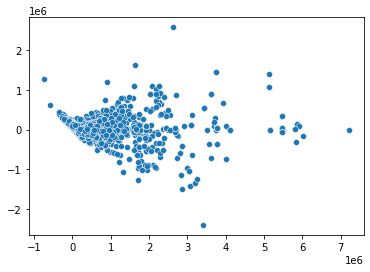

In [310]:
# RESIDUAL PLOT:
residual = model.resid
fitted = model.fittedvalues

sns.scatterplot(fitted,residual)
plt.show()

1. Model is not linear
2. As the errors do not show equal variances we can say that heteroscedasticity is present
3. Also we donot observe any pattern in above residual plot so we can say that there is no autocorrelation present.

<a class="anchor" id="17"></a>
#### 5.MULTICOLLINEARITY (Inter relation or influence of features on each other)

In [314]:
## 5.MULTICOLLINEARITY (Inter relation or influence of features on each other)

# Variance Inflation Factor (VIF)
col=X_train_d.columns
vif = []
VIF1=[variance_inflation_factor(X_train_d.values, i) for i in range(X_train_d.shape[1])]

dfvif=pd.DataFrame({'Features':col,'VIF':VIF1})

dfvif

,Features,VIF
0,km_driven,1.484631
1,mileage,7.736472
2,engine,25.260226
3,max_power,20.065503
4,age,3.266785
...,...,...
216,car_Volvo S90,2.056742
217,car_Volvo V40,23.658020
218,car_Volvo XC40,26.262246
219,car_Volvo XC60,2.092323


In [326]:
# VIF Values of only numerical variables
dfvif.iloc[:5,:]

,Features,VIF
0,km_driven,1.484631
1,mileage,7.736472
2,engine,25.260226
3,max_power,20.065503
4,age,3.266785


<a class="anchor" id="18"></a>
#### Inferences-Problems found:

On testing the assumption of Linear regression we have found that:
1. Data is neither normally distributed nor is in linear relationship with target.
2. Also Heteroscedasticity is observed.

<a class="anchor" id="19"></a>
### REGULARIZING THE BASE MODEL.

<a class="anchor" id="20"></a>
#### RIDGE REGULARIZATION

In [427]:
ridge = Ridge()

ridge.fit(X_train_d,y_train_d)

print('Train score for Regularized model:')
print(ridge.score(X_train_d,y_train_d))

Train score for Regularized model:
0.9464943641308643


In [390]:
print('Test score for Regularized model')
print(ridge.score(X_test_d,y_test_d))

Test score for Regularized model
0.8934913234330192


<a class="anchor" id="21"></a>
#### Hyperparameter Alpha Tuning

In [420]:
param_grid={'alpha':np.arange(0,4,0.1)}
grid=GridSearchCV(Ridge(),param_grid)
grid.fit(X_train_d,y_train_d)

print('Best alpha value:',grid.best_params_)
print('Train score for Ridge Regularized tuned model:',grid.score(X_train_d,y_train_d))
print('Test score for Ridge Regularized tuned model:',grid.score(X_test_d,y_test_d))

Best alpha value: {'alpha': 0.2}
Train score for Ridge Regularized tuned model: 0.9564283457209829
Test score for Ridge Regularized tuned model: 0.884219736904143


<a class="anchor" id="22"></a>
#### DECISION TREE REGRESSOR 

In [403]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_d,y_train_d)
print('Train score for Decision tree regressor model:')
print(dtr.score(X_train_d,y_train_d))

Train score for Decision tree regressor model:
0.9996683658883604


In [404]:
print('Test score for Decision tree regressor model:')
print(dtr.score(X_test_d,y_test_d))

Test score for Decision tree regressor model:
0.9329888398323726


<a class="anchor" id="23"></a>
## APPLYING FEW ENSEMBLE TECHNIQUES

<a class="anchor" id="24"></a>
#### RANDOM FOREST REGRESSOR

In [446]:
rfr=RandomForestRegressor()

rfr.fit(X_train_d,y_train_d)
print('Train score for Random Forest regressor model:')
print(rfr.score(X_train_d,y_train_d))

Train score for Random Forest regressor model:
0.995857553309673


In [447]:
print('Test score Random Forest regressor model:')
print(rfr.score(X_test_d,y_test_d))

Test score Random Forest regressor model:
0.9490842966688756


In [448]:
y_pred_rfr=rfr.predict(X_test_d)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test_d,y_pred_rfr))

178291.25564959348

<a class="anchor" id="25"></a>
#### VALIDATION CURVE (for Random Forest Regressor)

(0.5, 1.0)

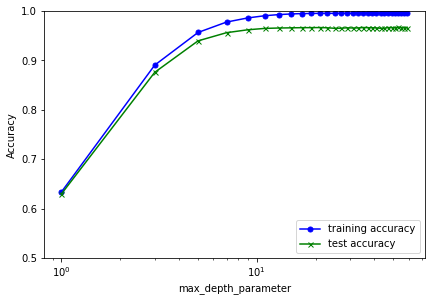

In [409]:
C_param_range = range(1,61,2)

plt.figure(figsize=(15, 10))

train_scores, test_scores = validation_curve(estimator=rfr,X=X_train_d,y=y_train_d ,param_name='max_depth',param_range=C_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.subplot(2,2,1)
plt.semilogx(C_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.semilogx(C_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('max_depth_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

(0.5, 1.0)

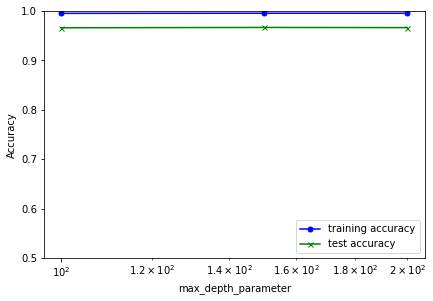

In [411]:
C_param_range = range(100,201,50)

plt.figure(figsize=(15, 10))

train_scores, test_scores = validation_curve(estimator=rfr,X=X_train_d,y=y_train_d ,param_name='n_estimators',param_range=C_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.subplot(2,2,1)
plt.semilogx(C_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.semilogx(C_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('max_depth_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

<a class="anchor" id="26"></a>
#### APPLYING GRID SEARCH CV ON RANDOM FOREST REGRESSOR (Max_depth and N_estimators hyper parameter)

In [412]:
### tuning random forest model based on validation curves above
params={'max_depth': range(8,30,2),'n_estimators' : range(100,201,50)}

grid_rf= GridSearchCV(rfr,params)
grid_rf.fit(X_train_d,y_train_d)
grid_rf.best_params_

{'max_depth': 24, 'n_estimators': 150}

<a class="anchor" id="27"></a>
#### RANDOM FOREST REGRESSOR TUNED MODEL

In [416]:
rfr_tuned=RandomForestRegressor(max_depth= 24 , n_estimators= 150)

rfr_tuned.fit(X_train_d,y_train_d)
print('Train score for Tuned Random Forest regressor model:')
print(rfr_tuned.score(X_train_d,y_train_d))

Train score for Tuned Random Forest regressor model:
0.9960279247102278


In [417]:
print('Test score Tuned Random Forest regressor model:')
print(rfr_tuned.score(X_test_d,y_test_d))

Test score Tuned Random Forest regressor model:
0.9453361181562948


In [449]:
y_pred_rfr_tuned=rfr_tuned.predict(X_test_d)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test_d,y_pred_rfr_tuned))

184737.220220253

Even after tuning it is observed that randomn forest regressor is giving score almost similar to without tuned model.

<a class="anchor" id="28"></a>
#### XGBOOST REGRESSOR

In [421]:
xgb=XGBRegressor()
xgb.fit(X_train_d,y_train_d)
print('Train score for XGBoost regressor model:')
print(xgb.score(X_train_d,y_train_d))

Train score for XGBoost regressor model:
0.9932909945006948


In [424]:
print('Test score Tuned Random Forest regressor model:')
print(xgb.score(X_test_d,y_test_d))

Test score Tuned Random Forest regressor model:
0.9494031652266364


<a class="anchor" id="29"></a>
#### VALIDATION CURVE (for XGBoost Regressor)

(0.5, 1.0)

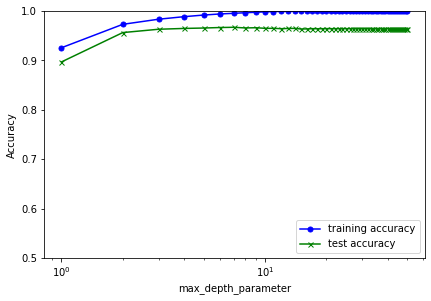

In [432]:
C_param_range = range(1,51)

plt.figure(figsize=(15, 10))


train_scores, test_scores = validation_curve(estimator=xgb,X=X_train_d,y=y_train_d ,param_name='max_depth',param_range=C_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.subplot(2,2,1)
plt.semilogx(C_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.semilogx(C_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('max_depth_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])

(0.1, 2)

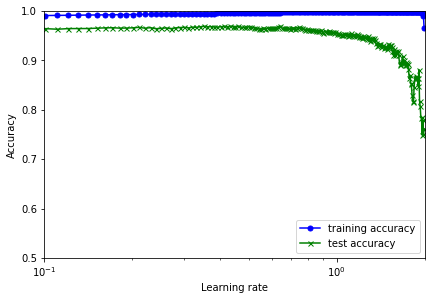

In [431]:
C_param_range = np.arange(0.001,2,0.010)

plt.figure(figsize=(15, 10))

# Logistic Regression validation curve
train_scores, test_scores = validation_curve(estimator=xgb,X=X_train_d,y=y_train_d ,param_name='learning_rate',param_range=C_param_range)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.subplot(2,2,1)
plt.semilogx(C_param_range
            ,train_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.semilogx(C_param_range
            ,test_mean
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1])
plt.xlim([0.1,2])

<a class="anchor" id="30"></a>
#### APPLYING GRID SEARCH CV ON XGBOOST REGRESSOR (Max_depth and learning_rate hyper parameter)

In [434]:
### tuning XGBOOST model based on validation curves above
params={'max_depth': range(8,20,2),'learning_rate' : np.arange(0.5,1.1,0.05)}

grid_xgb= GridSearchCV(xgb,params)
%time grid_xgb.fit(X_train_d,y_train_d)
grid_xgb.best_params_ 

Wall time: 45min 36s


{'learning_rate': 0.55, 'max_depth': 8}

<a class="anchor" id="31"></a>
#### XGBOOST REGRESSOR TUNED MODEL

In [436]:
xgb_tuned=XGBRegressor(max_depth=8,learning_rate=0.55)
xgb_tuned.fit(X_train_d,y_train_d)
print('Train score for Tuned XGBoost regressor model:')
print(xgb_tuned.score(X_train_d,y_train_d))

Train score for Tuned XGBoost regressor model:
0.9980145420360889


In [437]:
print('Test score Tuned XGBoost regressor model:')
print(xgb_tuned.score(X_test_d,y_test_d))

Test score Tuned XGBoost regressor model:
0.9553862067319602


<a class="anchor" id="32"></a>
## CONCLUSION:

-After an overview of data,thorough preprocessing steps were performed like: 
1. Data cleaning
2. Null Values Imputation
3. Duplicate rows treatment.

-Extensive EDA was performed after data preprocessing and following insights were found:

1. Strong Inverse correlation was observed between Age of the vehicle and Selling price of the car.
2. Strong Positive corelation was observed between max_power and Selling price of the car.
3. Cars with fuel type as CNG are most fuel efficient and cost effective.
4. Mileage for petrol and diesel car is distributed within the range of 10-30 Kmpl.
5. Overall Petrol cars are comparitively cheaper in comparison to Diesel cars.
  51. High Concentration of Petrol Cars in the selling price range : 0-2 lakhs.
  52. High Concentration of Diesel Cars in the selling price range : 0-6 lakhs.
6. It is clearly visible that selling price of a car decreases as the number of preowners increases.
7. Dealer Type seller type is able to get a higher bid for a car as compare to individual seller type.
8. A general trend of increasing Kms driven is observed with age of a car.
9. Cars with fuel type as Diesel is predominant in our dataset as compared to other fuel types.
10. It is observed that mostly people are trying ot sell their car on their own as compared to reaching out to a dealer. 
11. Majority of cars in our dataset is having seating capacity of 5.
12. Cars with transmission as Manual are more as compared to automatic transmission. 
13. There are no cars present with automatic tranmission having fuel type LPG or CNG.
14. Trustmark and dealers are only selling petrol and diesel cars.
15. Test drive cars are available only in fuel type as petrol. 
16. Our data contains maximum first Owner cars in both Diesel and Petrol fuel type.


-Two Base Models were createdand Linear Regression was applied on them.
1. First model was created with categorical variables label encoded. 
2. Second model was created woth categorical variable dummy encoded.
    
-Overall Base Model with Categorical variable encoded as dummy performed better and following evaluation metrics were deduced:
1. R2 value on Train Data: 0.958
2. R2 value on Test Data:  0.872

    
-Assumptions of Linear regression were tested after the Base model evaluations and following inferences were deduced:
1. Data is neither normally distributed nor is in linear relationship with target.
2. Also Heteroscedasticity is observed.
    
-Base model was further regularized using Ridge Regularization and alpha parameters was tuned to give final metrics as :
1. R2 value on Train Data:  0.956
2. R2 value on Test Data:   0.884
    
    
-Going forward few Ensemble techniques were applied and tuned to compare and find the best algorithm with best metrics.

Random Forest Regressor was applied and tuned and the results are as follows:
 1. R2 value on Train Data: 0.996
 2. R2 value on Test Data:  0.949

      
XGBoost Regressor was applied and tuned and the results are as follows:
1. R2 value on Train Data: 0.998
2. R2 value on Test Data:  0.956

          
-So we can say that we can say that XGBoost is performing slightly better on our dataset when compared to Random forest
 Regressor.
 
-Overall both XGBoost and Random forest regressor are giving much better results as compared to Linear Regression. 